In [1]:
import os
import numpy as np
import pandas as pd
import sympy as sp
from matplotlib import pyplot as plt

%matplotlib inline

# 2.1

In [2]:
data = np.array([1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21])

In [3]:
class LogCauchy():
    def __init__(self, data, gamma = 1):
        self.delta = 1e-11
        self.epsilon = 1e-11
        self.data = data
        self.gamma = gamma
        self.theta = sp.symbols('theta')
        self.log_like = 0
        for point in self.data:
            self.log_like = self.log_like + sp.log(1/np.pi*self.gamma/((point-self.theta)**2+self.gamma**2))
        self.log_like_diff = sp.diff(self.log_like, self.theta)
        self.log_like_diff2 = sp.diff(self.log_like_diff, self.theta)
        
    def plot(self, low, high, sep):
        X = np.arange(low, high, sep)
        Y = []
        for point in X:
            Y.append(self.value(point))
        plt.figure(figsize=(10,7))
        plt.plot(X,Y,"-")
        plt.xlabel("theta")
        plt.ylabel("value")
        plt.title("Log-likelyhood curve")
        plt.show()
        
    def value(self, X):
        return float(self.log_like.evalf(subs={self.theta:X}))
    
    def diff(self, X):
        return float(self.log_like_diff.evalf(subs={self.theta:X}))
    
    def diff2(self, X):
        return float(self.log_like_diff2.evalf(subs={self.theta:X}))
    
    def Newton_Method(self, X0, delta = 1e-10):#一维精确搜索——牛顿法
        x_tmp=X0
        while(abs(self.diff(x_tmp))>delta):
            x_tmp=x_tmp-self.diff(x_tmp)/self.diff2(x_tmp)
        return x_tmp
    
    def Bisectin_Method(self, low, high, delta = 1e-10):
        a = low
        b = high
        mid = (a+b)/2
        while(1):
            da = self.diff(a)
            db = self.diff(b)
            dmid = self.diff(mid)
            if(da*db<=0):
                if(da*dmid>0):
                    a = mid
                elif(db*dmid>0):
                    b = mid
                new_mid = (a+b)/2
                if(abs(new_mid-mid)/(abs(mid)-delta)<delta):
                    return new_mid
                else:
                    mid = new_mid
    
    def fixed_point_method(self, start, alpha = 1, delta = 1e-10):
        x_tmp = start
        while(alpha*abs(self.diff(x_tmp))>=delta):
            if(abs(alpha*self.diff2(x_tmp)+1)<1):
                x_tmp = self.diff(x_tmp) + x_tmp
            else:
                print("not lipschitz continous at scale factor = %f"%(alpha))
                return None
        return x_tmp
    
    def secant_method(self, x0, x1, delta = 1e-10):
        x_tmp0 = x0
        x_tmp1 = x1
        while(abs(self.diff(x_tmp1))>delta):
            tmp=x_tmp1-self.diff(x_tmp1)/((self.diff(x_tmp1) - self.diff(x_tmp0))/(x_tmp1-x_tmp0))
            x_tmp0 = x_tmp1
            x_tmp1 = tmp
        return x_tmp1

In [4]:
log_likely = LogCauchy(data,gamma=1)

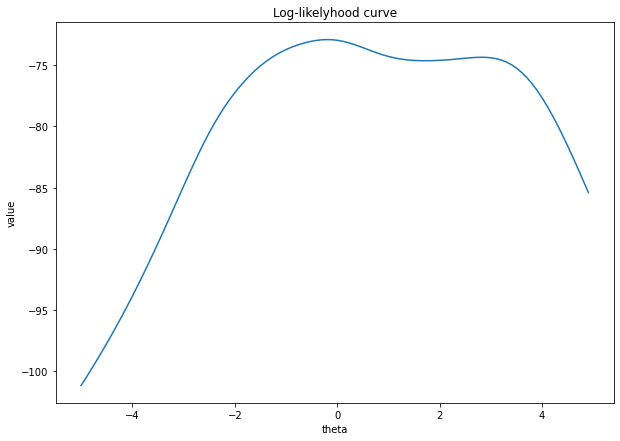

In [5]:
log_likely.plot(-5,5,0.1)

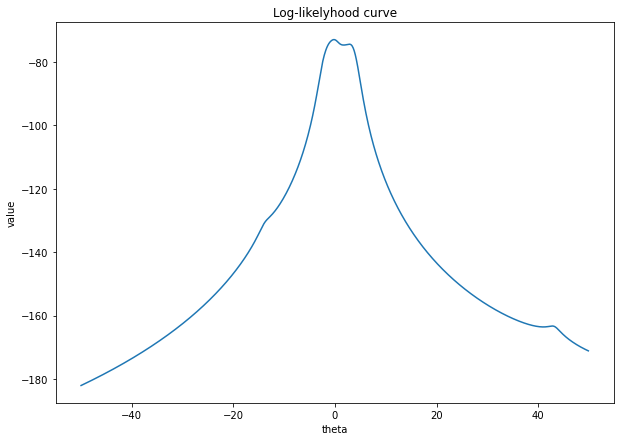

In [6]:
log_likely.plot(-50,50,0.1)

In [7]:
starting_points = [-11,-1,0,1.5,4,4.7,7,8,38, np.mean(data)]
end_points = []
print("mean = %f"%(np.mean(data)))
for point in starting_points:
    end_points.append(log_likely.Newton_Method(X0=point, delta=1e-10))
print(end_points)

mean = 5.106000
[-430536915055.17645, -0.192286613229646, -0.19228661322559568, 1.7135868348079237, 2.817472165573244, -0.19228661322964866, 41.040847817944304, -600406869793.7178, 42.79537747201752, 54.87661790729173]


In [8]:
point2 = log_likely.Bisectin_Method(-1, 1, delta = 1e-10)
print("最优解为%f, 最优值为%f"%(point2, log_likely.value(point2)))

最优解为-0.500000, 最优值为-73.050692


In [9]:
for alpha in [1, 0.64, 0.25]:
    point3 = log_likely.fixed_point_method(-1, alpha, delta = 1e-10)
    if(point3 is not None):
        print("最优解为%f, 最优值为%f"%(point3, log_likely.value(point2)))

not lipschitz continous at scale factor = 1.000000
not lipschitz continous at scale factor = 0.640000
not lipschitz continous at scale factor = 0.250000


In [10]:
log_likely.secant_method(x0=-2, x1=-1, delta = 1e-10)

-0.1922866132319395

In [11]:
log_likely.secant_method(x0=-3, x1=3, delta = 1e-10)

2.8174721655730948

# 2.2

In [12]:
data = np.array([3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50])

In [13]:
class CosineDense():
    def __init__(self, data):
        self.delta = 1e-11
        self.epsilon = 1e-11
        self.data = data
        self.theta = sp.symbols('theta')
        self.log_like = 0
        for point in self.data:
            self.log_like = self.log_like + sp.log(1/2/np.pi*(1-sp.cos(point-self.theta)))
        self.log_like_diff = sp.diff(self.log_like, self.theta)
        self.log_like_diff2 = sp.diff(self.log_like_diff, self.theta)
        
    def plot(self, low=-np.pi, high=np.pi, sep=0.01):
        X = np.arange(low, high, sep)
        Y = []
        for point in X:
            Y.append(self.value(point))
        plt.figure(figsize=(10,7))
        plt.plot(X,Y,"-")
        plt.xlabel("theta")
        plt.ylabel("value")
        plt.title("Log-likelyhood curve")
        plt.show()
        return X, Y
        
    def value(self, X):
        return float(self.log_like.evalf(subs={self.theta:X}))
    
    def diff(self, X):
        return float(self.log_like_diff.evalf(subs={self.theta:X}))
    
    def diff2(self, X):
        return float(self.log_like_diff2.evalf(subs={self.theta:X}))
    
    def Newton_Method(self, X0, delta = 1e-10):#一维精确搜索——牛顿法
        x_tmp=X0
        while(abs(self.diff(x_tmp))>delta):
            x_tmp=x_tmp-self.diff(x_tmp)/self.diff2(x_tmp)
        return x_tmp
    
    def Bisectin_Method(self, low, high, delta = 1e-10):
        a = low
        b = high
        mid = (a+b)/2
        while(1):
            da = self.diff(a)
            db = self.diff(b)
            dmid = self.diff(mid)
            if(da*db<=0):
                if(da*dmid>0):
                    a = mid
                elif(db*dmid>0):
                    b = mid
                new_mid = (a+b)/2
                if(abs(new_mid-mid)/(abs(mid)-delta)<delta):
                    return new_mid
                else:
                    mid = new_mid
    
    def fixed_point_method(self, start, alpha = 1, delta = 1e-10):
        x_tmp = start
        while(alpha*abs(self.diff(x_tmp))>=delta):
            if(abs(alpha*self.diff2(x_tmp)+1)<1):
                x_tmp = self.diff(x_tmp) + x_tmp
            else:
                print("not lipschitz continous at scale factor = %f"%(alpha))
                return None
        return x_tmp
    
    def secant_method(self, x0, x1, delta = 1e-10):
        x_tmp0 = x0
        x_tmp1 = x1
        while(abs(self.diff(x_tmp1))>delta):
            tmp=x_tmp1-self.diff(x_tmp1)/((self.diff(x_tmp1) - self.diff(x_tmp0))/(x_tmp1-x_tmp0))
            x_tmp0 = x_tmp1
            x_tmp1 = tmp
        return x_tmp1

In [14]:
dense_f =  CosineDense(data)

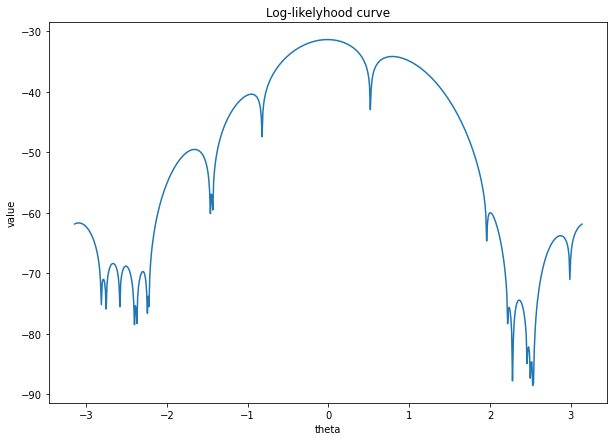

In [15]:
X,Y=dense_f.plot()

In [16]:
np.arcsin(np.mean(data)-np.pi)

0.05844060614042408

In [17]:
dense_f.Newton_Method(X0=np.arcsin(np.mean(data)-np.pi))

-0.011972002283305973

In [18]:
dense_f.Newton_Method(X0=-2.7)

-2.666699926100948

In [19]:
dense_f.Newton_Method(X0=2.7)

2.8730945142450826

In [20]:
start_list = np.arange(-np.pi, np.pi, 2*np.pi/200)
converge_list = []
for point in start_list:
    converge_list.append(dense_f.Newton_Method(X0=point))

In [21]:
show_list=[]
for point in converge_list:
    show_list.append(dense_f.value(point))


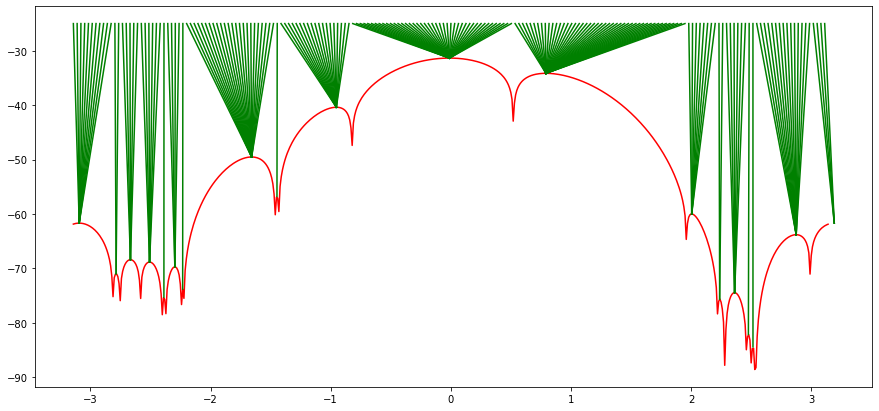

In [22]:
plt.figure(figsize = (15,7))
plt.plot(X, Y, color = "red")
for i in range(len(show_list)):
    plt.plot([start_list[i],converge_list[i]], [-25, show_list[i]], color="green")
plt.show()

# 2.4

In [23]:
M_list = np.arange(1/np.exp(1), 0, -1/np.exp(1)/100000)
x1 = np.arange(1/10000,0.05129329438755058,1/1000000)

In [24]:
x2 = -np.log(np.exp(-x1)-0.95)
idx = np.where(np.abs(x1*np.exp(-x1)-x2*np.exp(-x2))<1e-5)

In [25]:
x1[idx]

array([0.042362, 0.042363, 0.042364, 0.042365])

In [26]:
x2[idx]

array([4.76501827, 4.76513074, 4.76524323, 4.76535573])

In [27]:
np.exp(-x1[idx])*(1+x1[idx])-np.exp(-x2[idx])*(1+x2[idx])

array([0.94999396, 0.94999849, 0.95000302, 0.95000754])

# 2.5

In [28]:
class LogPoisson():
    def __init__(self, data_N, data_b1, data_b2):
        self.delta = 1e-5
        self.epsilon = 1e-10
        self.data_N, self.data_b1, self.data_b2 = np.array(data_N).reshape(-1,1), np.array(data_b1).reshape(-1,1), np.array(data_b2).reshape(-1,1)
        self.data_b = np.concatenate([self.data_b1, self.data_b2], axis=1)

        self.alpha1 = sp.symbols('alpha1')
        self.alpha2 = sp.symbols('alpha2')
        self.alpha = sp.Matrix([self.alpha1, self.alpha2])

        self.log_like = -np.sum(self.data_b @ self.alpha) - np.sum(np.log(np.vectorize(np.math.factorial)(self.data_N))) + np.sum(np.vectorize(sp.log)(self.data_b @ self.alpha)*self.data_N)
        self.log_like_grad = sp.Matrix([sp.diff(self.log_like, var) for var in self.alpha])
        self.log_like_hessian = sp.hessian(self.log_like, self.alpha)

        self.BT_dict = {"None":self.addtracking, "StepHalving":self.StepHalvingBacktracking}

    def value(self, X):
        #sympy_value = np.float32(self.log_like.subs([(self.alpha[i], v) for i, v in enumerate(X.reshape(-1))]))
        my_value = -np.sum(self.data_b @ X) - np.sum(np.log(np.vectorize(np.math.factorial)(self.data_N))) + np.sum(np.log(self.data_b @ X)*self.data_N)
        return my_value
    
    def grad(self, X):
        #sympy_grad = np.float32(self.log_like_grad.subs([(self.alpha[i], v) for i, v in enumerate(X.reshape(-1))]))
        my_grad = self.data_b.T@(self.data_N/(self.data_b@X) - 1)
        return my_grad

    def hessian(self, X):
        #sympy_hessian = np.float32(self.log_like_hessian.subs([(self.alpha[i], v) for i, v in enumerate(X.reshape(-1))]))
        my_hessian = -(self.data_b/(self.data_b@X)).T @ ((self.data_N*self.data_b/(self.data_b@X)))
        return my_hessian
    
    def fisherI(self, X):
        return self.data_b.T@(self.data_b/(self.data_b@X))
    
    def diff_t(self, X, D, t):
        return np.dot(self.grad(X+t*D).T, D)
    
    def diff_2_t(self, X, D, t):
        return np.sum(np.dot(self.hessian(X+t*D).T, D))
    
    def addtracking(self, X0, D):
        t_tmp = 1

        if(np.sum(X0+t_tmp*D<0) > 0):
            tmp = (X0+t_tmp*D).reshape(-1)
            strip = np.min(tmp) - 1e-12
            idx = np.argmin(tmp)
            length = t_tmp*D[idx]
            delt = (length - strip)/length
            t_tmp = t_tmp*delt
        return X0+t_tmp*D, t_tmp*D
    
    def StepHalvingBacktracking(self, X0, D):
        t_tmp = 1

        if(np.sum(X0+t_tmp*D<0) > 0):
            tmp = (X0+t_tmp*D).reshape(-1)
            strip = np.min(tmp) - 1e-12
            idx = np.argmin(tmp)
            length = t_tmp*D[idx]
            delt = (length - strip)/length
            t_tmp = t_tmp*delt

        while(self.value(X0 + D*t_tmp) < self.value(X0)):
            t_tmp = 0.5*t_tmp
        
        return X0+t_tmp*D, t_tmp*D
    
    
    def NewtonMethod(self, X0, epsilon, backtracking="None"):
        tmp_x = X0
        values = [self.value(tmp_x)]
        t_ks = [tmp_x]
        hessian_inv = np.linalg.inv(self.hessian(tmp_x))
        delta_x_nt = -np.dot(hessian_inv, self.grad(tmp_x))
        t_k = tmp_x
        while(np.sqrt(np.sum(t_k**2)) > epsilon):
            #tmp_x, t_k = self.Backtracking(tmp_x, delta_x_nt, self.delta)
            tmp_x, t_k = self.BT_dict[backtracking](tmp_x, delta_x_nt)
            hessian_inv = np.linalg.inv(self.hessian(tmp_x))
            delta_x_nt = -np.dot(hessian_inv, self.grad(tmp_x))

            values.append(self.value(tmp_x))
            t_ks.append(tmp_x)
            #print(self.value(tmp_x), np.sum(self.grad(tmp_x)**2), lamda_square/2)
            
        return tmp_x, np.concatenate(t_ks, axis=1).T
    
    def FisherScoringMethod(self, X0, epsilon, backtracking="None"):
        tmp_x = X0
        values = [self.value(tmp_x)]
        t_ks = [tmp_x]
        fisherI_inv = np.linalg.inv(self.fisherI(tmp_x))
        delta_x_nt = np.dot(fisherI_inv, self.grad(tmp_x))
        t_k = tmp_x
        while(np.sqrt(np.sum(t_k**2)) > epsilon):
            tmp_x, t_k = self.BT_dict[backtracking](tmp_x, delta_x_nt)
            fisherI_inv = np.linalg.inv(self.fisherI(tmp_x))
            delta_x_nt = np.dot(fisherI_inv, self.grad(tmp_x))

            values.append(self.value(tmp_x))
            t_ks.append(tmp_x)
            #print(self.value(tmp_x), np.sum(self.grad(tmp_x)**2), lamda_square/2)
            
        return tmp_x, np.concatenate(t_ks, axis=1).T
    
    def SteepestAscentMethod(self, X0, epsilon, backtracking="None"):
        tmp_x = X0
        values = [self.value(tmp_x)]
        t_ks = [tmp_x]
        delta_x_nt = self.grad(tmp_x)
        t_k = tmp_x
        while(np.sqrt(np.sum(t_k**2)) > epsilon):
            tmp_x, t_k = self.BT_dict[backtracking](tmp_x, delta_x_nt)
            #tmp_x, t_k = tmp_x + 0.01*delta_x_nt, 0.01*delta_x_nt
            delta_x_nt = self.grad(tmp_x)
            values.append(self.value(tmp_x))
            t_ks.append(tmp_x)
            #print(self.value(tmp_x), np.sum(self.grad(tmp_x)**2), lamda_square/2)
            
        return tmp_x, np.concatenate(t_ks, axis=1).T
    
    def QuasiNewtonMethod(self, X0, epsilon, backtracking="None"):
        tmp_x = X0
        M = np.diag(-np.ones(2))
        values = [self.value(tmp_x)]
        delta_x_nt = -np.linalg.inv(M)@self.grad(tmp_x)
        t_ks = [tmp_x]
        t_k = tmp_x
        while(np.sqrt(np.sum(t_k**2)) > epsilon):
            tmp_x, t_k = self.BT_dict[backtracking](tmp_x, delta_x_nt)
            z = t_k
            y = self.grad(tmp_x) - self.grad(tmp_x-t_k)
            v = y - M@z
            c = 1/(v.T@z)
            M = M + c*v@v.T
            delta_x_nt = -np.linalg.inv(M)@self.grad(tmp_x)
            values.append(self.value(tmp_x))
            t_ks.append(tmp_x)
            #print(self.value(tmp_x), np.sum(self.grad(tmp_x)**2), lamda_square/2)
            
        return tmp_x, np.concatenate(t_ks, axis=1).T
    def get_value_map(self, map):
        x_map = map[0]
        y_map = map[1]
        value_map = np.zeros(x_map.shape)
        for i in range(x_map.shape[0]):
            for j in range(x_map.shape[1]):
                X = np.array([[x_map[i,j]], [y_map[i,j]]])
                value_map[i,j] = self.value(X)
        return value_map
    
    def plot_all_iterations(self, X0):
        map_X = np.linspace(0.8,2.5,200)
        map_Y = np.linspace(0.8,1.8,200)
        map = np.meshgrid(map_X, map_Y)
        map_Value = self.get_value_map(map)

        MLE_Newton = self.NewtonMethod(X0, epsilon=1e-10, backtracking="None")
        MLE_Fisher = self.FisherScoringMethod(X0, epsilon=1e-10, backtracking="None")
        MLE_SteepestAscent = self.SteepestAscentMethod(X0, epsilon=1e-10, backtracking="StepHalving")
        MLE_QuasiNewton = self.QuasiNewtonMethod(X0, epsilon=1e-10,  backtracking="StepHalving")
        MLE_QuasiNewton_nobt = self.QuasiNewtonMethod(X0, epsilon=1e-10,  backtracking="None")

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        CS = ax.contour(map_X, map_Y, map_Value, levels=np.linspace(-70, -47.9, 60), linestyles='dashed', colors='k')
        ax.clabel(CS, inline=True, fontsize=10)
        ax.plot(MLE_Newton[1][:,0], MLE_Newton[1][:,1],"-", color = "red", label="Newton no-step-halving")
        ax.plot(MLE_Fisher[1][:,0], MLE_Fisher[1][:,1],"-", color = "green", label="Fisher no-step-halving")
        ax.plot(MLE_SteepestAscent[1][:,0], MLE_SteepestAscent[1][:,1],"-", color = "blue", label="SteepestAscent step-halving")
        ax.plot(MLE_QuasiNewton[1][:,0], MLE_QuasiNewton[1][:,1],"-", color = "orange", label="Quasi-Newton step-halving")
        ax.plot(MLE_QuasiNewton_nobt[1][:,0], MLE_QuasiNewton_nobt[1][:,1],"-", color = "purple", label="Quasi-Newton no-step-halving")
        ax.legend()
        fig.show()


In [29]:
#根据论文表格中的数据得到
data = pd.read_csv("oilspills.dat", sep=" ", index_col=0)
data_N = data["spills"]
data_b1 = data["importexport"]
data_b2 = data["domestic"]
data.head(5)

,spills,importexport,domestic
year,,,
1974,2,0.720,0.22
1975,5,0.850,0.17
1976,3,1.120,0.15
1977,3,1.345,0.20
1978,1,1.290,0.59


In [30]:
logPoisson = LogPoisson(data_N, data_b1, data_b2)

In [31]:
X0 = np.array([[1,1]]).T

In [32]:
MLE_Newton = logPoisson.NewtonMethod(X0, epsilon=1e-10, backtracking="None")
max_point_Newton, iterations_Newton = MLE_Newton
print("牛顿法搜索得到的最优点为: (%f, %f)\n迭代次数为%d, 迭代过程为:"%(max_point_Newton[0], max_point_Newton[1], iterations_Newton.shape[0]))
for p in iterations_Newton:
    print("(%f, %f)"%(p[0],p[1]))

牛顿法搜索得到的最优点为: (1.097153, 0.937555)
迭代次数为6, 迭代过程为:
(1.000000, 1.000000)
(1.090831, 0.942676)
(1.097128, 0.937575)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)


In [33]:
MLE_Fisher = logPoisson.FisherScoringMethod(X0, epsilon=1e-10, backtracking="None")
max_point_Fisher, iterations_Fisher = MLE_Fisher
print("Fisher Scoring方法搜索得到的最优点为: (%f, %f)\n迭代次数为%d, 迭代过程为:"%(max_point_Fisher[0], max_point_Fisher[1],  iterations_Fisher.shape[0]))
for p in iterations_Fisher:
    print("(%f, %f)"%(p[0],p[1]))

Fisher Scoring方法搜索得到的最优点为: (1.097153, 0.937555)
迭代次数为21, 迭代过程为:
(1.000000, 1.000000)
(1.117785, 0.906284)
(1.090702, 0.947331)
(1.099195, 0.934459)
(1.096508, 0.938531)
(1.097356, 0.937246)
(1.097088, 0.937652)
(1.097173, 0.937524)
(1.097146, 0.937564)
(1.097155, 0.937552)
(1.097152, 0.937556)
(1.097153, 0.937554)
(1.097152, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)


In [34]:
np.sqrt(logPoisson.fisherI(max_point_Fisher))

array([[4.05118009, 3.06428095],
       [3.06428095, 2.80713521]])

In [35]:
MLE_SteepestAscent = logPoisson.SteepestAscentMethod(X0, epsilon=1e-10, backtracking="StepHalving")
max_point_SteepestAscent, iterations_SteepestAscent = MLE_SteepestAscent
print("Steepest Ascent方法搜索得到的最优点为: (%f, %f)\n迭代次数为%d, 迭代过程为:"%(max_point_SteepestAscent[0], max_point_SteepestAscent[1],  iterations_SteepestAscent.shape[0]))
for p in iterations_SteepestAscent:
    print("(%f, %f)"%(p[0],p[1]))


Steepest Ascent方法搜索得到的最优点为: (1.097153, 0.937555)
迭代次数为65, 迭代过程为:
(1.000000, 1.000000)
(1.069551, 1.024199)
(1.049867, 0.996378)
(1.082775, 0.990198)
(1.068151, 0.971739)
(1.090170, 0.969765)
(1.079268, 0.957362)
(1.086722, 0.957386)
(1.085973, 0.948943)
(1.091176, 0.949461)
(1.090110, 0.944052)
(1.093764, 0.944723)
(1.092678, 0.941222)
(1.095259, 0.941884)
(1.094770, 0.940739)
(1.096113, 0.940178)
(1.095704, 0.939422)
(1.096597, 0.939151)
(1.096268, 0.938647)
(1.096868, 0.938531)
(1.096609, 0.938191)
(1.097017, 0.938155)
(1.096817, 0.937924)
(1.096956, 0.937925)
(1.096943, 0.937767)
(1.097040, 0.937777)
(1.097021, 0.937676)
(1.097089, 0.937688)
(1.097069, 0.937623)
(1.097117, 0.937635)
(1.097099, 0.937593)
(1.097133, 0.937604)
(1.097125, 0.937590)
(1.097142, 0.937584)
(1.097136, 0.937575)
(1.097147, 0.937573)
(1.097142, 0.937567)
(1.097150, 0.937566)
(1.097146, 0.937562)
(1.097149, 0.937562)
(1.097149, 0.937559)
(1.097150, 0.937559)
(1.097150, 0.937557)
(1.097151, 0.937557)
(1.097151, 

In [36]:
MLE_QuasiNewton = logPoisson.QuasiNewtonMethod(X0, epsilon=1e-10,  backtracking="StepHalving")
max_point_QuasiNewton, iterations_QuasiNewton = MLE_QuasiNewton
print("Quasi-Newton方法使用StepHalvingBacktracking搜索得到的最优点为: (%f, %f)\n迭代次数为%d, 迭代过程为:"%(max_point_QuasiNewton[0], max_point_QuasiNewton[1],  iterations_QuasiNewton.shape[0]))
for p in iterations_QuasiNewton:
    print("(%f, %f)"%(p[0],p[1]))


Quasi-Newton方法使用StepHalvingBacktracking搜索得到的最优点为: (1.097153, 0.937555)
迭代次数为10, 迭代过程为:
(1.000000, 1.000000)
(1.069551, 1.024199)
(1.116833, 0.923460)
(1.098062, 0.937130)
(1.097143, 0.937555)
(1.097152, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)


In [37]:
MLE_QuasiNewton_nobt = logPoisson.QuasiNewtonMethod(X0, epsilon=1e-10,  backtracking="None")
max_point_QuasiNewton_nobt, iterations_QuasiNewton_nobt = MLE_QuasiNewton_nobt
print("Quasi-Newton方法不使用StepHalvingBacktracking搜索得到的最优点为: (%f, %f)\n迭代次数为%d, 迭代过程为:"%(max_point_QuasiNewton_nobt[0], max_point_QuasiNewton_nobt[1],  iterations_QuasiNewton_nobt.shape[0]))
for p in iterations_QuasiNewton_nobt:
    print("(%f, %f)"%(p[0],p[1]))

Quasi-Newton方法不使用StepHalvingBacktracking搜索得到的最优点为: (1.097153, 0.937555)
迭代次数为11, 迭代过程为:
(1.000000, 1.000000)
(2.112823, 1.387177)
(1.218099, 0.819302)
(0.894957, 1.183313)
(1.109377, 0.917175)
(1.098494, 0.941024)
(1.097771, 0.937359)
(1.097155, 0.937550)
(1.097153, 0.937555)
(1.097153, 0.937555)
(1.097153, 0.937555)


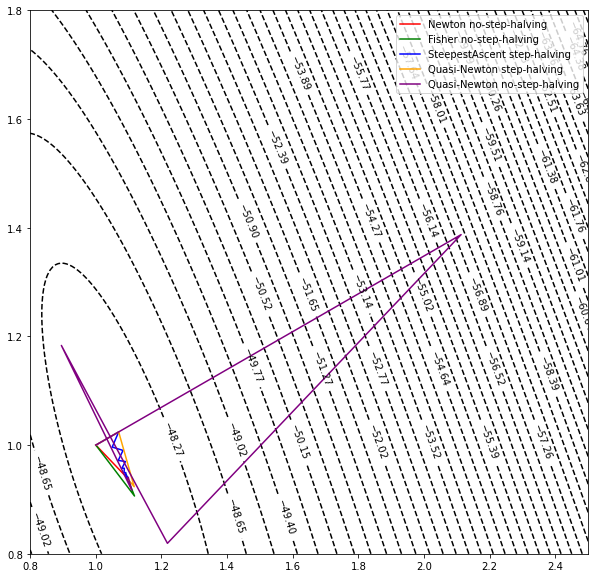

In [38]:
logPoisson.plot_all_iterations(X0)